In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
%matplotlib inline

import json
import numpy as np

from collections import Counter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

In [12]:
from folium.plugins import MarkerCluster

In [3]:
MOW = [55.75222, 37.61556]


Колонка Описание

terminal_id - идентификационный номер терминала

customer_id - идентификационный номер клиента

amount - количество потраченных средств за транзакцию

country - страна

currency - валюта

mcc - код категории продавца

transaction_date - дата транзакции

atm_address - адрес банкомата

pos_address - адрес установки pos-терминала

pos_address_lat - адрес установки pos-терминала широта

pos_address_lon - адрес установки pos-терминала долгота

work_add_lat - широта работы клиента

work_add_lon - долгота работы клиента

home_add_lat - широта дома клиента

home_add_lon - долгота дома клиента


In [4]:
train_df = pd.read_csv('./data/train_set.csv')

C:\Anaconda3\work\raiffazen\env\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
mcc_codes = pd.read_csv('./data/mcc_codes.csv', index_col='mcc')

In [6]:
train_df.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


In [9]:
customer_gr = train_df.groupby('customer_id')

In [9]:
customer_gr.aggregate('count')

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
customer_id,,,,,,,,,,,,,,,,,
0001f322716470bf9bfc1708f06f00fc,100,68,18,18,100,100,100,100,100,100,32,32,32,100,100,100,100
0007297d86e14bd68bd87b1dbdefe302,247,69,62,62,247,247,247,247,247,247,178,178,178,247,247,0,0
000b709c6c6fb1e8efcfd95e57c2a9de,40,5,4,4,40,40,40,40,40,40,34,35,35,40,40,40,40
0027a7618d97cc9fbda55fac457eaeb7,14,1,0,0,14,14,14,14,14,14,13,13,13,14,14,0,0
002b9f6e118c54f1292e03d1a04d516e,179,27,1,1,179,179,179,179,179,179,150,152,152,179,179,0,0
0031915eb230f772681fb5dc5a8d1c31,185,50,20,20,185,185,185,185,185,185,130,135,135,185,185,185,185
003360bff9882ca4a4f93394dd984822,62,14,14,14,62,62,62,62,62,62,48,48,48,62,62,0,0
0037f3de3d890df1022cc760a1dfd9d6,73,14,14,14,73,73,73,73,73,73,59,59,59,73,73,0,0
003fa58414cc55531fcc38423bea8f8e,210,16,13,13,210,210,210,210,210,210,194,194,194,210,210,210,210


In [10]:
test_cust = '0007297d86e14bd68bd87b1dbdefe302'

test_set = customer_gr.get_group(test_cust)
test_set

In [14]:
pos_position = test_set.loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=6)
сluster = MarkerCluster(pos_position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [15]:
atm_position = test_set.loc[:,['atm_address_lat', 'atm_address_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(atm_position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [16]:
c = test_set.set_index(pd.to_datetime(test_set.transaction_date))

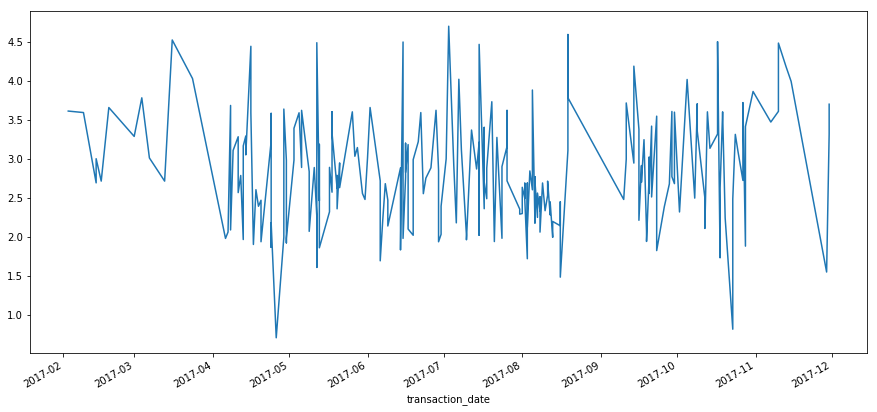

In [17]:
plt.figure(figsize = [15,7])
c.amount.plot()

In [18]:
test_set.mcc.unique()

array([5814, 5411, 5541, 5992, 4111, 5912, 8999, 5999, 5812, 5943, 7230,
       4812, 5942, 5813, 4112, 8099, 5699, 5499, 7832, 5719, 5947, 5451,
       5691, 8299, 6011], dtype=int64)

In [19]:
for code in train_df.mcc.unique():
    try:
        print(code, mcc_codes.loc[code,'edited_description'], '\n')
    except Exception as e:
        print(code, '-Error')

5261 Nurseries – Lawn and Garden Supply Store 

5992 Florists 

5411 Grocery Stores, Supermarkets 

5814 Fast Food Restaurants 

5812 Eating places and Restaurants 

5813 Drinking Places (Alcoholic Beverages), Bars, Taverns, Cocktail lounges, Nightclubs and Discotheques 

5499 Misc. Food Stores – Convenience Stores and Specialty Markets 

5912 Drug Stores and Pharmacies 

4111 Local/Suburban Commuter Passenger Transportation – Railroads, Feries, Local Water Transportation. 

5691 Men’s and Women’s Clothing Stores 

7832 Motion Picture Theaters 

5641 Children’s and Infant’s Wear Stores 

8099 Medical Services and Health Practitioners (Not Elsewhere Classified) 

5541 Service Stations ( with or without ancillary services) 

5722 Household Appliance Stores 

5533 Automotive Parts, Accessories Stores 

5521 Automobile and Truck Dealers (Used Only) 

5300 Wholesale Clubs 

5532 Automotive Tire Stores 

8071 Medical and Dental Laboratories 

5944 Watch, Clock, Jewelry, and Silverware Stores

In [20]:
cnt = Counter()
for k, tr in test_set.iterrows():
    cnt[tr.mcc] +=1

for k, v in cnt.most_common():
    try:
        name = mcc_codes.loc[k,'edited_description']
    except Exception as err:
        name = ' ****  '
 
    print(k, name, v)

6011 Financial Institutions – Manual Cash Disbursements 69
5411 Grocery Stores, Supermarkets 65
5814 Fast Food Restaurants 56
5912 Drug Stores and Pharmacies 11
5812 Eating places and Restaurants 8
5999 Miscellaneous and Specialty Retail Stores 7
5992 Florists 5
4812 Telecommunications Equipment including telephone sales 3
4111 Local/Suburban Commuter Passenger Transportation – Railroads, Feries, Local Water Transportation. 2
8999 Professional Services ( Not Elsewhere Defined) 2
7230 Barber and Beauty Shops 2
5942 Book Stores 2
5499 Misc. Food Stores – Convenience Stores and Specialty Markets 2
7832 Motion Picture Theaters 2
5541 Service Stations ( with or without ancillary services) 1
5943 Stationery Stores, Office and School Supply Stores 1
5813 Drinking Places (Alcoholic Beverages), Bars, Taverns, Cocktail lounges, Nightclubs and Discotheques 1
4112 Passenger Railways 1
8099 Medical Services and Health Practitioners (Not Elsewhere Classified) 1
5699 Miscellaneous Apparel and Accesso

### MCC 5411 Grocery Stores, Supermarkets

In [21]:
mcc_code = 5411
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=MOW, zoom_start=11)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

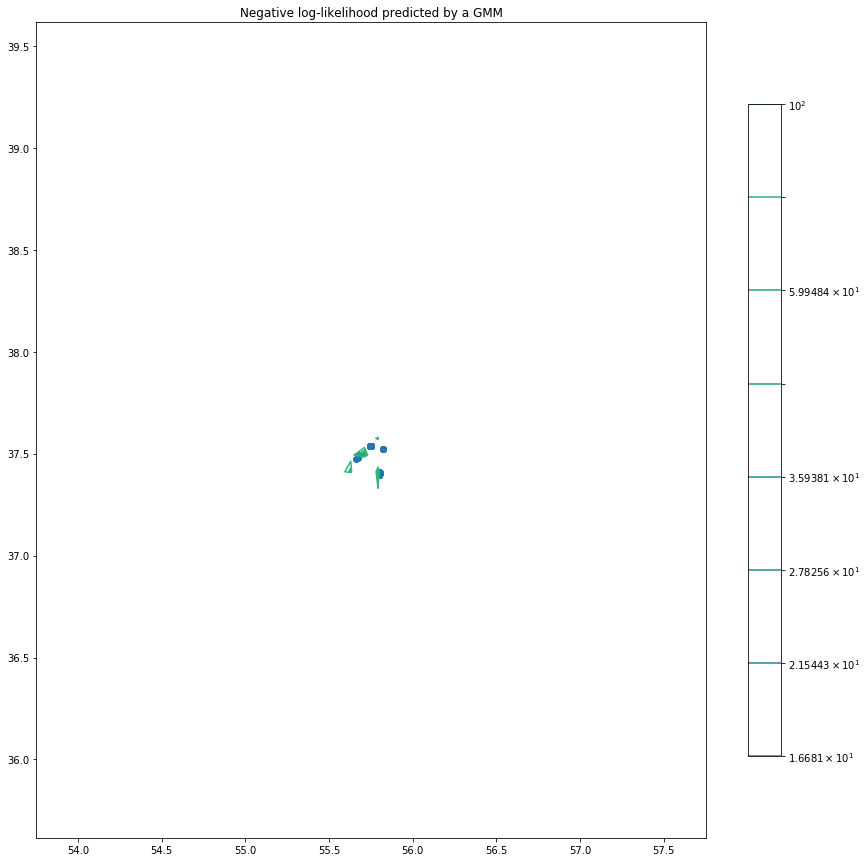

In [22]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=4, covariance_type='full', max_iter= 5000)
clf.fit(position)

# display predicted scores by the model as a contour plot
x = np.linspace(MOW[0]-2, MOW[0]+2)
y = np.linspace(MOW[1]-2, MOW[1]+2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

plt.figure(figsize= [15, 15])

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(1, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(position[:,0], position[:,1])

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [23]:
clf.precisions_

array([[[ 5.11670016e+05, -9.71307063e+04],
        [-9.71307063e+04,  5.68298003e+04]],

       [[ 6.88684282e+05, -3.85878347e+05],
        [-3.85878347e+05,  5.21700672e+05]],

       [[ 8.96030468e+04, -9.11966457e+04],
        [-9.11966457e+04,  1.05676866e+05]],

       [[ 1.00000000e+06, -1.21169035e-15],
        [-1.21169035e-15,  1.00000000e+06]]])

In [24]:
clf.weights_

array([0.61538462, 0.29230769, 0.04615385, 0.04615385])

In [25]:
clf.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 5000,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [26]:
mcc_code = 5411
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

pred_pos = clf.means_[0]
#fig = folium.element.Figure()
map_ = folium.Map(location=MOW, zoom_start=11)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

MarkerCluster([clf.means_[0]], popups= ['G0']).add_to(map_)
MarkerCluster([clf.means_[1]], popups= ['G0']).add_to(map_)
MarkerCluster([clf.means_[2]], popups= ['G2']).add_to(map_)

map_

### MCC 5814 Fast Food Restaurants

In [27]:
mcc_code = 5814
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [28]:
mcc_code = 5912
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

In [29]:
mcc_code = 7230
position = test_set.query('mcc == @mcc_code').loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
home_pos = np.unique(home_pos, axis=0)[0]

#fig = folium.element.Figure()
map_ = folium.Map(location=[56, 40], zoom_start=5)
сluster = MarkerCluster(position).add_to(map_)
сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

map_

## Baseline на основе кластеризации покупок в супермаркетах и food store

In [7]:
mcc_code = 5411
print(mcc_codes.loc[mcc_code])

edited_description      Grocery Stores, Supermarkets
combined_description    Grocery Stores, Supermarkets
usda_description                      Grocery Stores
irs_description         Grocery Stores, Supermarkets
irs_reportable                         No1.6041-3(c)
Name: 5411, dtype: object


In [ ]:
test_cust = '0007297d86e14bd68bd87b1dbdefe302'

In [14]:
clf = mixture.GaussianMixture(n_components=4, covariance_type='full', max_iter= 5000)
clf.fit(pos_position)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=5000,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
centers = clf.means_
weights = clf.weights_

best_clt = np.argmax(weights)
best_pos = centers[best_clt, :]

best_pos

array([55.80063222, 37.40069227])

In [16]:
from geopy.distance import vincenty

In [38]:
vincenty(best_pos, home_pos).km

0.8164755452812019

In [37]:
haversine(best_pos, home_pos)

0.012758342457264135

In [62]:
def haversine(pos1, pos2):
    """
    Calculate the great circle distance between two points 
    """
    return np.sqrt((pos1[0]-pos2[0])**2+(pos1[1]-pos2[1])**2)

In [63]:
res = {}
for user in customer_gr.groups:
    test_set = customer_gr.get_group(user).query('mcc == @mcc_code')
    test_set.head()

    pos_position = test_set.loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()

    # find home position
    home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()
    
    if (len(home_pos) ==0):
        res.update({user: [np.nan, np.nan, np.nan, np.nan, np.nan]})
        continue
    home_pos = np.unique(home_pos, axis=0)[0]
    
    if len(np.unique(home_pos, axis=0)) >2:
        raise ValueError('Wrong home position. Check it!!!')

        
    if pos_position.shape[0] < 10:
        best_pos = pos_position.mean(axis=0)
    else:
    
        clf = mixture.GaussianMixture(n_components=4, covariance_type='full', max_iter= 5000)
        clf.fit(pos_position)

        centers = clf.means_
        weights = clf.weights_

        best_clt = np.argmax(weights)
        best_pos = centers[best_clt, :]

    d = haversine(best_pos, home_pos)
    print(d)
    res.update({user: [d, best_pos[0], best_pos[1], home_pos[0], home_pos[1]]})

0.0716952222034325
0.012796791318208038
3.7465188547436545
0.3718059938673907
0.08912910992058376
0.03188902988041533
0.09569497072846597
0.09499458609707544
0.025603928941957645
0.013135864413863827
0.007808779704407756
0.13960777660350798
0.0037999292066587887
0.0014592741971306466
0.13794965030352108
22.788151649925453
0.012690498960232794
64.53756602473234
0.007628529715935102
0.1317866086281145
0.11619450675428349
23.355951327944467
0.005181420490635847
0.06899218783870947
0.08511264087148139
0.037258525875541654
0.020990113606222056
0.2618413572046952
10.795367560445131
0.01740125777882084
0.02406211046288242
0.07175345303862962
0.033912143253766416
4.03742769103316
0.009561498385713449
0.03839575931370881
0.4253989018073976
0.007120114689549893
0.10907304040551669
32.562766323064835
0.18350546768867645
8.84889255717923
0.012711354073508034
0.06667056705602759
0.03876120680518135
8.804013231010233
0.3047962845337621
0.016315154036231797
2.9802351603573793
0.010378364314726045
0.0

0.08918249199803065
0.07117088483010377
0.009350993483040058
0.015413125569355616
0.01964751600428946
0.46681260277769165
0.966074330688125
11.245809651402233
0.11756182228840424
0.432180551748219
0.44275788725311743
0.009107688529617092
0.3067963425505737
0.12418588313546405
3.4989945273210794
0.17915079235612816
0.322920926915143
0.09739391956743823
0.08843617189877813
0.004308691052948953
0.07777789113304898
4.879420398071014
0.4121090660620028
0.0979401140709611
0.05114736995169
0.004571805048509539
0.01847278443510524
0.15245643810245907
0.04050174500113056
0.018380590391358025
0.03152243744000051
0.17126252428833066
0.0954655682970797
0.02208494592476022
0.004972883138019064
0.2221516602321932
4.900658300987341
0.5800038723980085
0.19904628467478394
0.08324871498407695
8.248953984723602
0.04311891557953888
0.004998706949660055
0.18044342957295698
0.24049986715241525
0.002983246921071466
0.07051545580267878
21.052621390827127
0.35879086856984366
0.005670573223866062
0.052696426638

0.06763355792538558
0.5656386301948696
0.0024224301517215573
9.86330275937667
0.022937369917176625
0.009975628574570001
0.23816695412502112
0.02052531417756048
0.007201685110451513
0.00265488422779222
0.09423548842038607
0.018329906267626397
0.025412409433422947
0.015248117076587086
0.38405793012748435
0.004177918549848595
0.006268885163535399
0.0064318136303159095
0.23516435995173943
0.006496430940856276
0.008022431915579059
0.34312119463433244
0.029286769658172757
0.020070982729383992
19.706562589559052
0.09720155682197344
0.048837350331518085
0.011377081782829817
1.1223807633529133
0.16293855017553552
3.657521793896971
0.0014085642327936977
0.20089879969673177
0.00780309895484037
0.1608076260319032
0.2629311749906442
0.19371675945681868
0.006006062529634518
0.06465495177526351
0.004737812232844261
0.003776927990887494
10.679055258279664
0.261501971525976
0.03122410209433046
0.005027451666732912
0.01915282001965505
0.003939105707258312
0.0064048929358291274
0.002466949974713408
0.010

0.32765430448555266
0.021695333486896062
0.510715584257914
8.653650468387122
0.3032166731254916
0.05085771298229391
24.020089830947466
0.25980025967415615
0.005431698701223783
0.4825059752092025
0.09245439055771101
14.261048269353472
0.01603637729053911
0.017165984323064307
0.18329577742069209
0.08923304799296775
0.45651892522039406
0.003222920514876168
0.004874359713336698
0.006896606129273631
0.3601186195266503
0.3220811858547718
0.1733106860998436
0.029889410762638284
0.03950104179107745
0.057942164649430965
0.9581077436184561
0.012093567972536414
0.06832421451586851
0.011608746826483041
0.24759698820891532
0.08391450615360063
0.005248021300977578
0.0214254923444241
0.3098636169996882
0.001339539783858505
0.023413988073377426
0.0055143937187687
0.0015430240768457163
0.16761338835070114
8.781448320276954
0.0034655832006299965
0.08721513462007074
0.2510892367081736
0.13070457244069628
0.005172591990797198
0.08966204492300911
0.04460658481833704
0.026530568256621683
0.2032667789081138


8.001704943130886
0.0036696344677237835
0.26674286030798533
0.28795043127863107
0.094307877641338
0.03046200732807412
0.07211609769842846
0.39086747636986197
0.011899745314852526
0.015438860365005823
12.442395616061482
0.5152049268875807
0.0063054527418821395
0.14592443146915485
0.10198032282055837
0.004435410911919235
0.005769771587984164
0.009897548059086802
0.0033038258443536745
0.44966532409294485
7.840921862948575
0.005512642856715962
0.0037438472377599777
0.0018839730624444905
0.013489403367264036
0.01760420871584172
0.4534831590014028
0.060598255633738586
8.578831704813757
0.05408257558774828
0.006186099766808201
0.02184071294411588
0.00836840111669422
0.014654208321207599
0.3803127803047166
0.7350306760703197
1.3737306508130651
0.01903182213324813
0.23076915346440313
1.0360012657939595
0.28876287804845613
0.019043608425038255
0.35483742878997593
0.011913054424661226
45.239799409393136
0.1082607243535589
0.7954664639813094
0.5840969529977335
1.2528273385911126
0.0246024076930618

0.0808265980613277
0.0038470116676852205
0.019299151347189375
0.002876369159373203
0.2925905409190858
0.0015501576443995855
0.1485612114138305
0.1264802469153323
0.0036180883052644476
0.00929279792515069
0.047627327349729486
12.796487519692132
8.201176672428554
0.3402803683206414
0.007623493393604757
0.11320206329668304
0.027365228186182162
1.1286424643370978
0.2482476752807873
0.00710463310648473
0.22339357790302058
8.767413467700484
1.4340892086263421
0.6866676533274526
0.028382092544864984
0.18312835350161316
0.015313677608304902
0.033340325777743006
0.0104334098767328
0.11244604836756412
1.5210766899101222
0.009978367389076924
1.421809780173952
0.038781248509342385
0.06077306779532356
0.10063406864669563
0.24510134132753741
0.12657550861282302
0.04421826114678059
0.06931404234328803
3.2621048966293755
0.0206366040624883
0.0030679500604112084
0.0007640213674429354
0.04924086383616853
5.469248155700113
0.07514754309552209
1.1209034823122215
22.34211558420024
0.08042544177594425
0.000

0.08205231399036766
0.004370364520587908
0.3148159929703007
0.01652144602616831
0.08395868667334197
0.004099328230910264
0.01282908853871386
0.006469468695648518
0.0861172021230586
0.004702878351529848
0.006459114514334755
0.04487664105877392
31.283748706338155
17.556713761819747
0.026674740102458218
0.08470290400538777
0.008696474619931375
0.19680608408561545
0.01255548259146521
0.1733236781231932
0.26171600765190756
0.01696090229933003
0.013695590769725484
0.018379205201478458
0.0003936024135834107
0.011180925694652623
0.2620819482713797
0.007837808680544523
0.032955736173829714
0.04011258902886528
4.391322900843333
0.032754221422750564
0.013657324744414882
0.7162712805188619
0.18389380075180561
7.506329382674578
0.09892762030627258
0.030754711746792375
0.027762950676049322
8.37493579123955
0.006268461975627577
0.01845890959075966
0.025057822974718286
0.5793703524965855
0.10141884566116757
0.0027426960945708943
0.30287990147564814
0.15479336477332245
0.04245764848354195
0.08798449011

0.009241982263232876
0.23144938840069673
0.3200521592686076
9.957878090469482
0.05170249140084557
0.01415218270085869
0.025618920903282563
6.560190101384253
0.0017121113393841806
0.09476068309147781
0.0689376121692198
0.960251214462054
0.005720098581203009
0.05360051891133435
0.004699997933394597
0.0634416426083688
0.280505844013162
1.18002684736801
4.4646763501844795
0.13998798479692218
0.02320794488294085
1.2750393826691293
0.31476451079861634
0.00633273367399789
0.25884189993950796
0.10028486414003064
0.005712345429788402
0.08381578407295019
0.013473096087302414
0.13709667253748925
7.997446466708292
0.015659508451760822
0.1282557703306845
0.14487943385649427
0.15411836615933677
0.025635477164104116
5.799956960358183
0.031824672916206304
0.0017844557265513337
0.005825414546378307
0.06964053469145721
0.22217674976865198
0.18223112907773872
0.003018752794116165
0.3616702046443165
0.01626249071570438
0.0028749372187858806
0.2838045608804911
2.422791098117406
0.018134786064926082
0.18674

0.00989114155031941
0.013474337128775918
0.8841057533858194
0.5253513171032113
52.14072909389372
1.0148490559293684
6.066559827025527
0.0010802649151607112
0.11914874622924188
4.089407035963705
0.0027539462955749544
0.030986580125207604
0.5321824026751761
0.00527626764389145
0.07043697620447945
0.0051090289286877455
0.13344938607874293
0.023755547693396134
2.468711906642606
4.370312530892762
0.008723558003910056
15.918328534594188
0.008248410079190156
0.0021090460161343016
6.9576339238144245
0.001014102138767705
0.0013029089009000457
0.25777885553351787
0.00017708443086795014
0.17707379935018244
0.09796461623504517
3.8146297376307436
66.1481995772907
0.03496584905123109
0.0069891186527191555
0.007113656604726343
0.00944711445558607
0.003695515735628763
0.012286435022882581
2.525516656306516
0.02635889334119673
0.2528313929672943
0.014390226321932712
0.211864631527242
0.0035315681579728615
0.04147969449500851
0.004508834585071768
0.00984457451193997
0.24907040297091032
0.711924482443115

0.10899596276248265
0.016996994026397882
0.022001405960457857
0.00772099988437054
10.017461719324341
0.004734967549153027
0.04978253192368675
0.008616983112432414
0.4170051419829225
0.020355030664239306
0.004033500973077243
0.04095352752813129
1.30002592791201
19.21622363142346
0.0042257603961359585
0.01863251875094786
11.165473461922803
0.009889743760636163
0.15468341594621116
47.32077613294913
0.023769678319215386
0.018151551303416655
2.4542834790283052
0.003595965537933557
0.0719939518041438
0.040754286850008266
0.040008711741616694
0.012434084068409262
0.35906152679319703
0.026305955588596466
0.010731492396963532
1.6973925810064763
0.09642437641372575
0.19574371218897843
0.006135734044423244
0.005195741713583581
0.0015514072423781701
35.72553244483893
0.005432155304808021
0.22988761340110012
0.3385854640090876
0.412073838708352
0.031249267919792583
10.822395660606292
0.07126736796856963
0.00597207947060929
0.5426029409112388
0.0042190663771104996
0.17450372779476175
0.2079107763271

0.001729457917965448
0.007143205542856402
0.09357934134107052
0.0028248599455220464
0.25376468269686714
0.36989169558705887
0.16162164765519457
0.13929353224425522
0.0041207153309071294
0.007885068646198706
0.13478025777789795
0.13819682303226782
0.2709752844793152
0.004795104105929525
0.10968992847024153
0.17603742208129158
0.03806724532201786
0.07880695925815315
0.009460899238551765
0.09080905353297944
0.24248273805354081
2.919492146965882
30.361144217787512
12.979234787275804
0.0798696038985158
0.038091150050501774
0.01050000359397954
0.14771189249712216
0.016045085995180855
0.0052966314117016185
0.0034995646386323854
0.09439182896030314
95.22560865040477
0.003343567884079696
0.05652868644363825
0.2743339307178647
0.026920012315726837
4.405069317066251
0.00390186312546717
0.0049102944251986575
0.05853321663926245
0.021948632280182914
0.06418414916072174
0.009777774154170301
0.10383628986902212
0.08931105121349803
0.1314702350227858
16.667029300605122
27.809626581345086
0.00977261068

0.013976502727224246
24.276349501285768
0.016364068251592187
0.23811221086074513
0.8247055573434252
0.017168799478712197
0.058550974720646645
4.6304987992918525
0.05529229024020707
0.18417224661999304
0.024254178285258964
0.0065373062897756485
5.261254727053196
0.008596049461907314
0.6578959103057711
0.00273047405223863
0.24240199362275067
0.004658540637792607
4.171869656562746
0.007784106397787942
0.026965646326226472
0.10475231694973829
0.5829095482410583
0.40530451440753745
0.08995678532627953
0.010597223153682231
0.009823640902030525
6.098248661312705
0.3043368473816217
8.285029425735226
0.0028015647531400498
0.06668211319133058
0.09955936556455469
0.05002098609806512
0.1382528044270996
0.1255316637053442
0.037405778628259924
0.007151931186073256
27.883799961066085
8.14165202379516
0.06589266563434591
0.010592535156917186
1.2330180658955476
0.591133796538346
0.36123386029655563
0.013234572273073907
0.018916558611664507
0.2597226291600821
0.029387832537816225
0.015854015377134708
0.

0.5363064517197733
0.04882614469190538
0.25071346072842116
0.00024064873695228684
0.001939050192714122
0.04008805304558515
0.011209343177877841
0.1898836213550801
0.11677326954100539
0.01080650574660847
11.531555539700149
0.12490125440931521
0.012675087719364717
0.1493181380064064
0.0413274809394105
0.18494387907014073
15.182806179385146
0.45092878954688825
0.009820816748867535
0.002019508897132279
0.09419196443751092
20.29014354390871
0.00857887749919176
0.27935928245762304
0.10422719190587972
0.21198136928076072
0.055948132693791085
0.004833316758489677
0.0050353461045435045
6.457209026122488
0.11049250888607715
0.0033545417488474658
0.20484312465008803
0.0009116372069020341
0.008319230083244766
0.06826537918455028
0.3696969211723893
0.09138702577436232
0.5302742900321015
0.11555531679086047
8.735930585097384
0.40934822228454276
0.03513502178859189
0.005710631568567144
0.15717588979066285
0.0060798661232446295
0.006528304174745003
0.38987196934565793
0.001951569287560276
4.3267799068

0.0032137629871579333
0.1556819833151935
0.06156093215964914
0.034994678779272294
0.10580607915716327
0.6675664829857065
0.034489851254320164
0.15412650561742916
0.0060527883420140064
0.002991547236467076
0.6379213063379198
0.11861499126516642
0.004620979700046597
0.07734286378826835
0.067263534069325
0.2706745247848451
0.0076369317245404906
0.041521165725864444
0.22837073228329552
0.04771386320405913
0.013774377667205073
0.22168405695485416
0.026582469642426644
0.2840617773626821
0.04028222938965013
0.02393051635424955
0.03964741850867528
0.14850755728716955
0.012979945093651845
0.13116287464661733
0.25872858378065466
0.01711169116927078
0.01987238422330621
0.025213322358799903
0.07384578420733999
0.5242216657388468
0.007714873868137209
0.014464117773211925
0.006088819341755356
0.018593638335315302
0.033328294989199134
0.04079104765431339
0.15907919660874179
1.6652995057003597
0.0031269015333665307
0.17453552312763024
0.013083906035846051
0.003632233701938832
2.7797895593394135
0.0830

0.06344528980615181
0.005531614636047423
0.03438001007523448
0.0011947079107150556
0.06891364777899825
0.40296459728334083
0.008264811430854195
0.23303961215015465
2.533149448530374
0.004188534260021771
0.006934113196397349
0.005536156468242108
0.00409557769798918
0.003312568430256034
0.02392606840322944
55.10738798373994
0.010383881136893803
0.03207429458454197
0.02717359716838067
0.1751817012944533
0.012797204602463004
0.0024886961768454986
0.016320907623822205
0.12672600868229333
0.089486617336265
0.009772897927471075
0.18482283673436165
8.030995846327695
0.014642908947049185
0.012006018418789443
0.00042987588804241735
0.013067323557704687
0.1675805997358351
0.018711274303225778
0.029193922596955135
0.005385599502848399
7.900161659112248
0.004538898427511797
0.8534404664581106
0.009719355173912838
0.005855818907279115
1.1067856487591023
0.026310681778045047
0.09530823328777531
0.02461530100052714
0.011376027521283064
0.01295191969543137
0.04341707914033702
0.12021493809849301
0.1421

0.01962754758929738
0.023492070229605592
0.023061793627773098
0.035428153350704254
0.06269566903395529
0.2419458515975109
0.09621947605712562
0.36457975910343865
0.09736577163771237
0.01229880163253381
0.0007421465496606533
0.18913399741879186
0.2787712120624745
8.578253138810298
0.045408672785341386
11.067823698302378
0.05324275012321749
9.973797873959606
0.004568160989086268
0.018426573179764538
0.21141749699867546
0.013027936078536223
0.11102753893294583
0.08791241710872728
0.01458578799908817
0.21343438205260726
15.975788537424453
0.02094507259950027
0.005278109881219698
0.0016085027387298168
0.056289647884383814
1.2987226968914969
2.500438346254605
0.13304061245746485
0.0017948938365974633
0.18142726489555935
0.0020373976488507113
11.807957875587501
0.500331439443143
0.19438148821785153
0.1402388376115142
0.19354506929081838
0.03548607944007742
3.032827424698844
0.0002998339136721024
11.005657549082581
10.505015025209483
0.0037264528724304377
0.1406816365450792
14.531255844810687


0.012138881729776063
0.0013441681056772317
0.013431576115012016
1.4090610370265908
0.568606698059213
0.04551614231506161
0.018436881372981793
0.013287906173553863
0.01906871608033992
0.013760585278984402
0.021979634410709162
0.3413744917734954
0.005353625649861646
9.90890479365056
0.08902199260792032
0.04849501823637333
1.4056996240740856
0.15636224194824289
0.1295276990557852
0.1413301779125258
0.10785966293210537
0.017996839479864895
0.03728495015167873
0.002512570205949466
0.16844129910044944
0.006221833126188213
0.002423493062184365
0.01211682096196793
0.03420614865982041
0.21497942037323625
0.14526467938161863
0.2643381032850941
0.2849991739533212
0.0038208714854100494
113.35355167822077
0.016066294792684333
0.0390789131671341
0.008185071315723226
0.050501042834774634
0.023720123354824596
0.06756223767379067
0.1771875715465743
0.004022162416649943
0.00225421831027578
0.004893895479859392
12.786857203267967
0.5004881923659246
0.18659632896844724
0.15170982367783653
0.00585263323546

0.04406585999130614
2.0432776167985516
0.02417358745506705
0.006447822049487261
0.001562342152006926
2.794507599203501
0.04116282073686828
0.001220628030790795
0.059962657242116885
0.00574806754944924
0.0739093675261116
0.10901428062579349
0.0032288597445619877
0.014950105566242064
0.0667083821359076
7.781204442748116
0.08027235420607662
0.002840230448389833
0.015404117145990888
0.011286833650188802
0.012279136451111833
12.665631840405535
0.33911858644592396
8.348590831672219
0.5244764551128506
0.0031006875528064165
0.9465695759392877
0.03524462607348141
0.006911317416282562
0.16103468579908117
1.3189313753277343
5.742032966697176
0.01552987935238361
3.994180001430201
0.0017276330895537391
0.04415423517026402
0.01205083781912607
0.02650239882849355
0.009302088117121318
0.06857839668986103
0.5033627112852895
0.10407517843959603
5.699581318965199
0.009631630571341827
0.0711930461102814
0.00027349163716456704
0.01014966793390229
0.38987444846125807
4.469348397272153
0.0064168178302151276


0.2696029892639397
0.42754230863267345
0.4467282892317116
3.584131525593081
0.42803532104613135
0.004094675475552018
0.047459443510414055
0.21156621659867728
0.001852287276725294
0.0019472786726414646
0.02054407045021165
0.3866631600149392
0.990166645243985
0.10426743480640473
0.0037510217026163507
11.96918565229304
0.48889629752245695
0.004209610531113672
1.4516480627161208
0.04032516669349118
2.7332691722384976
0.002469533462514434
0.011669997899382986
0.16223890682687128
0.2993612205981064
0.028512516532507675
0.014181684463002843
0.010514689335022032
0.0234137252857445
0.24928457046166255
0.010692827341737255
7.96047462066392
0.004178833761893687
0.2510836961842477
0.07199681373317963
0.019479555089202488
0.018173250251766027
0.015215786717175503
0.012581631579292594
0.3105598360305464
0.004145547704265661
0.009776262050741757
43.79860555803568
0.0033599629471090715
0.015131545472375402
0.7245329449370596
0.1516117092148072
0.01143468127499858
97.22542300485183
0.030584070213924407

0.004935529505574094
0.11450429229339439
4.286978213863892
0.14673928803063854
0.543670845555044
0.1470365585648462
0.08449963498847267
8.3988548284213
0.4797041072148989
0.1701571262782964
0.012857865037234557
0.14741914156722663
0.028595539090218274
0.35876923931674504
2.112561883137872
0.006360166291683099
0.030598083853022987
0.0027643839188550624
0.011117505278860747
5.63828747042981
0.002469564627430302
0.060660409796995114
0.10909690789188642
0.7657103274418462
0.00985328775422863
0.020439210511575354
0.005794703744404786
0.08525384047380086
0.03783875232116327
0.023041852758681723
2.969450268096891
0.0029274209548719563
0.38839861904327594
0.01827910299530774
0.03728927185145588
0.011896731647442859
0.06830770715503529
0.010766124398354518
0.040762702643588646
0.16064026588729205
0.017891207821063255
0.07909713204914655
0.6559088394014769
0.0016867705661295143
0.0930039560184589
0.377845068710556
0.06507067282769843
5.074945775055146
0.04425940242492244
0.13643556103022855
0.02

0.10472340902794125
0.08325338522504423
0.2341283000209349
0.12970389859300113
0.08845703131441726
0.009046130357653295
2.227950614553089
0.008204076505475898
0.05332917974656144
1.5381444404231097
0.010912341204864352
0.03584069939921764
0.0159863689844093
0.1394896539742234
0.045052059375030214
0.015830785988074827
0.13244272422642853
37.98482456620768
0.06583420808512169
0.006899166611530242
0.015223039091120579
0.012364532510208167
1.5497655053723531
0.011408742039360629
0.009004259130419984
0.023570952461983125
0.10223236606848982
0.001183576178337643
0.03682895182725645
0.003377952827990497
0.03497643290474831
0.01613685031710932
0.024814253525459858
0.00457656251095092
0.0073619180349043965
0.027868802957555987
15.072758519075737
0.007983332613150922
0.2842940427029819
0.01882348912812132
0.020564589002597153
0.2082638192096254
0.033827901558227194
0.23424682367376934
0.00331545741374416
0.006707760957224398
0.05881769854816776
0.039582520113333304
0.03617786203248268
0.02382814

0.007688454519453456
0.052475580124636295
0.036647421225682396
0.033726052908624904
0.056659825618793826
0.3450190403120482
0.012434794985980166
0.09819140357283881
0.033849035071200906
0.3843307605476407
0.03938828853164568
0.021652315894768008
0.6248102459861186
0.0073712223367169245
0.013497745095238078
0.07102860712965404
0.0023399035973102615
0.007159443581669026
0.007689961898270858
0.007089554973434298
0.022810933420826934
0.004475058062493355
0.14760700431817883
0.00671524273460457
0.13676705872798242
0.12817403497169794
0.1525799829256166
0.09177469900719978
0.006586247145374981
0.06153254109053754
0.11983875901597037
0.051904364617461445
0.25122457313759844
0.053530527510956195
0.11708491346729366
0.020828922206086686
13.78853547267961
0.0032682941770031454
0.008362401805681378
0.0009270942343409243
0.08160301619260678
0.00865265030614207
0.004707726648135207
0.08845181900972161
0.2518706219026995
0.8516668209092293
0.13586150417079515
0.11823553130328801
0.005715552872499627

0.013628411818370666
0.066353676380862
0.39030802008347265
0.014997464932157525
0.09259836121206595
0.18609805244489122
0.0661444273218718
1.555449071705977
0.007018026584773887
0.011276758293931816
0.006800350006319129
0.0030468607422329793
2.3578152744345595
0.016547952771703334
0.010152722628464417
0.019693503426853175
3.029180211674348
8.466015893816559
0.047007642883817174
0.2106864538024752
0.17736149089461806
0.13149022288214599
0.004594500555973327
0.03433492020368067
0.0014541762077923703
0.0040873971594824945
0.0038695581773920194
0.00831042990016867
0.16342577723526103
0.0021259786005549293
0.0017398943445097817
0.6383128592676813
0.15556815357348686
0.0128507806485253
0.24880876612669534
0.2584233257149633
0.008903935242920066
0.10140826283592365
0.26615262335317713
0.00693386744333301
1.408248482296666
0.13923343061690963
0.017203320432477406
0.010377415049656507
0.016484450449298464
0.022526471185748038
1.8130812051326546
1.832643706266215
0.0045815929781292015
0.03449937

0.03349977109439532
0.018135353408048453
0.997012296418268
0.009964609035419581
0.049216538022091506
0.17571979171628668
0.013576463736234657
0.3075998764156106
0.011272694843252877
0.0437825564978814
0.1970148514313124
0.004458839283284357
9.154592998910971
0.007718988386717531
0.020550715939639322
0.024383926442029885
0.18749896764335403
0.090841486905674
3.6786533426877557
0.03883745471739428
0.006378743302568514
2.4382108379584233
0.3366106806093522
0.05351150210322066
0.052821619726236835
4.2296392594659
0.11451782009405163
0.016293149315152248
0.09902084122780289
0.062456789155909916
0.011973260197821425
0.006663385950483693
6.2662327432766025
0.002307319688931197
0.02324704266138216
0.1879262198739939
10.96997190137124
0.010477995147217355
0.01991837485058452
0.004347826940173934
0.008432013495560081
0.009160045074291787
0.22647358389996305
0.22823195224261175
0.002409038645711511
0.00686486975516182
0.014217114880766149
0.014201936991639392
0.014090237783343297
0.00604621895888

In [68]:
res_df = pd.DataFrame.from_dict(res, orient='index')

In [72]:
res_df.columns = ['dist','best_post_lat','best_post_lon','home_post_lat','home_post_lon']

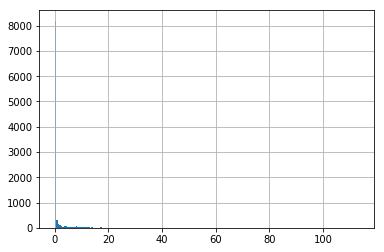

In [77]:
res_df.dist.hist(bins= 200)

In [78]:
res_df.query('dist >10')

,dist,best_post_lat,best_post_lon,home_post_lat,home_post_lon
007bb42c2a4eb9aa33f9bc5abae7632f,22.788152,55.917765,37.840418,56.760,60.613
00873fbbbd0790580594afcc0fe8ead8,64.537566,55.872453,37.676367,54.115,102.190
0098b0f7ec0a361fb6c483ca63596f03,23.355951,55.644263,37.479100,56.905,60.801
00bae192d0b8e7ffef23542989424c61,10.795368,55.659025,37.978722,44.865,38.149
00ec8d0496ab60db34b6a2c98b665e5e,32.562766,56.899803,60.750375,55.813,93.295
01a830ec20b6a051769d69b948abce4b,16.946695,54.710013,20.442624,55.849,37.351
026acdb7b404add3e9f5bc6b6b141cff,14.161428,59.008992,51.009950,55.665,37.249
02b24e2865d62a30cb60d73c357acfd9,62.443857,43.113023,133.129310,61.265,73.382
0306f32958f2bae319826339d7bcef1a,10.538118,58.140400,40.487315,59.738,30.071
03ed1db1585b6064a6899c1952a54502,12.959851,55.633757,37.320968,53.981,50.175


In [82]:
f = '007bb42c2a4eb9aa33f9bc5abae7632f'

In [117]:
def show_user(user, mcc_code = None, atm = False):

    if mcc_code:
        test_set = customer_gr.get_group(user).query('mcc == @mcc_code')
    else:
        test_set = customer_gr.get_group(user)
    
    if atm:
        pos_position = test_set.loc[:,['atm_address_lat', 'atm_address_lon']].dropna().as_matrix()        
    else:
        pos_position = test_set.loc[:,['pos_adress_lat', 'pos_adress_lon']].dropna().as_matrix()
    print(test_set)

    # find home position
    home_pos = test_set.loc[:,['home_add_lat','home_add_lon']].dropna().as_matrix()

    if len(np.unique(home_pos, axis=0)) >2:
        raise ValueError('Wrong home position. Check it!!!')

    home_pos = np.unique(home_pos, axis=0)[0]

    #fig = folium.element.Figure()
    map_ = folium.Map(location=MOW, zoom_start=11)
    сluster = MarkerCluster(pos_position).add_to(map_)
    сluster2 = MarkerCluster([home_pos], popups= ['Home']).add_to(map_)

    return map_

In [115]:
show_user(f, mcc_code=5411)

          amount atm_address  atm_address_lat  atm_address_lon          city  \
942235  2.727239         NaN              NaN              NaN  EKATERINBURG   
942236  2.820812         NaN              NaN              NaN       KOROLEV   
942237  2.681502         NaN              NaN              NaN  EKATERINBURG   
942238  2.487605         NaN              NaN              NaN        MOSCOW   
942239  2.694439         NaN              NaN              NaN  EKATERINBURG   
942240  2.615124         NaN              NaN              NaN       KOROLEV   
942241  3.119693         NaN              NaN              NaN  EKATERINBURG   
942242  1.543915         NaN              NaN              NaN  EKATERINBURG   
942243  1.977495         NaN              NaN              NaN       KOROLEV   
942244  2.061407         NaN              NaN              NaN  EKATERINBURG   
942245  2.892222         NaN              NaN              NaN  EKATERINBURG   
942246  3.052995         NaN            

In [110]:
show_user(f, atm=True)

[]


In [118]:
f2 = '04da17c3039ff59879191e31c2b4da16'
show_user(f2, atm=True)

           amount                                        atm_address  \
859259   2.103718                                                NaN   
859260   2.766637                                                NaN   
859261   2.524122                                                NaN   
859262   2.370871                                                NaN   
859263   2.310524                                                NaN   
859264   2.229149                                                NaN   
859265   2.557922                                                NaN   
859266   1.837279                                                NaN   
859267   2.348075                                                NaN   
859268   2.136862                                                NaN   
859269   2.419277                                                NaN   
859270   2.497857                                                NaN   
859271   2.608448                                               

In [120]:
customer_gr.get_group(f2)

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
859259,2.103718,NaN,NaN,NaN,MOSKVA,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5411,"11-13-3, NIKOLSKAYAMOSKVA109012 RUSRUS",55.756773,37.621301,b6022e1da3608cd69670e72b57b8a607,2017-09-22,46.949,142.742
859260,2.766637,NaN,NaN,NaN,MOSCOW,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5411,5 ZNAMENSKIE SADKI STRMOSCOW101000 RUSRUS,55.571478,37.569315,02b8ce2014690a9e30dc25da846e8afb,2017-09-21,46.949,142.742
859261,2.524122,NaN,NaN,NaN,MOSCOW,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5814,29 ZEMLYANOY VALMOSCOW101000 RUSRUS,55.758775,37.660602,e1fee2dbfc089064ddb513b2bb82c3e0,2017-06-03,46.949,142.742
859262,2.370871,NaN,NaN,NaN,KHIMKI,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5411,"IKEA AREA, ST 4KHIMKI141400 RUSRUS",55.905056,37.405497,38e03e291313c7da952ab3dcf041d7b1,2017-10-28,46.949,142.742
859263,2.310524,NaN,NaN,NaN,MOSCOW,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5732,ALTUFYEVSKOE SHOSSEMOSCOW127576 RUSRUS,55.856687,37.584374,d3ac6e825c70a4f695e1e3e25041287b,2017-06-04,46.949,142.742
859264,2.229149,NaN,NaN,NaN,MOSKVA,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5411,"11-13-3, NIKOLSKAYAMOSKVA109012 RUSRUS",55.756773,37.621301,b6022e1da3608cd69670e72b57b8a607,2017-10-12,46.949,142.742
859265,2.557922,NaN,NaN,NaN,MOSCOW,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5411,"7A, STR.1 ZNAMENSKIE SADKI SMOSCOW117628 RU...",55.572925,37.572921,6f14e1165804506a6ce2e94bb2c1bcc1,2017-04-29,46.949,142.742
859266,1.837279,NaN,NaN,NaN,MOSCOW,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5411,1 MANEZHNAYA SQ BLD 2MOSCOW141000 RUSRUS,55.754791,37.613638,314e23614650d51af306fbd592ec7c35,2017-05-24,46.949,142.742
859267,2.348075,NaN,NaN,NaN,MOSCOW,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5812,"43, BRESTSKAYA 2-YAMOSCOW101000 RUSRUS",55.939761,37.556534,2af417b3248d02f633e0a1897ed0e1fa,2017-05-07,46.949,142.742
859268,2.136862,NaN,NaN,NaN,MOSCOW,RUS,643.0,04da17c3039ff59879191e31c2b4da16,46.949,142.742,5331,7B KRONSHTADTSKIY BLVDMOSCOW125212 RUSRUS,55.844092,37.500899,07da100508ae9bcf36d9f41bb1f0a5e0,2017-10-15,46.949,142.742
